# Lana Del Rey Music Analysis

In this analysis, I will be diving into Lana Del Rey's Albums and Tracks along with their popularity ratings given by Spotify. I am drawing from the Spotify API and for context as to how the popularity scores are calculated I have included the description of the popularity score calculation below.

"The Spotify popularity score is a numerical representation of how well a track is performing on the platform. It ranges from 0 to 100, with higher scores indicating higher popularity. This score influences the track’s visibility on Spotify, including its likelihood of being featured on algorithmic playlists like Discover Weekly and Release Radar.

Spotify’s popularity score is determined by a variety of factors:

Streams: The number of times a track is streamed.
Recent Activity: More weight is given to recent streams.
Engagement: Includes likes, shares, saves, and playlist additions.
Listener Behavior: How long listeners play the track and if they skip it.
User Interactions: Actions such as follows, comments, and social shares."

Courtesy of: [Understanding Spotify's Popularity Score](https://yourmusicmanager.com/understanding-spotifys-popularity-score/)

### Connect to Spotify API and load data in:

In [4]:
! pip install spotipy

  Obtaining dependency information for spotipy from https://files.pythonhosted.org/packages/ea/35/304e456a471128aa4a776243558f43aee3444731ef8fc9bc8c351fddfdd8/spotipy-2.24.0-py3-none-any.whl.metadata
  Obtaining dependency information for redis>=3.5.3 from https://files.pythonhosted.org/packages/c5/d1/19a9c76811757684a0f74adc25765c8a901d67f9f6472ac9d57c844a23c8/redis-5.0.8-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.6/255.6 kB 7.6 MB/s eta 0:00:00


In [6]:
! pip install pandas

In [6]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd

# Spotify application credentials
client_id = 'bd4ee84dec214e37828435d85c4883fd'
client_secret = 'c0635473ab2446588d522e44b32dc89c'
redirect_uri = 'http://localhost:8888/callback'  
scope = 'user-library-read' 

# Create SpotifyOAuth instance
sp_oauth = SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri, scope=scope)


# Get the URL for user authentication
auth_url = sp_oauth.get_authorize_url()
print(f'Please go to this URL and authorize access: {auth_url}')

# After the user authorizes, they will be redirected to the redirect_uri with a code in the URL.
# You'll need to manually extract that code and use it here.

# This part is manual, you need to extract the code from the redirect URL
# You can get it by parsing the redirect URL
response_url = input('Enter the full redirect URL: ')

# Use the code to fetch the access token
code = sp_oauth.parse_response_code(response_url)
token_info = sp_oauth.get_access_token(code)


# Initialize Spotify API object
sp = spotipy.Spotify(auth=token_info['access_token'])

# Function to fetch tracks for an album
def fetch_album_tracks(album_id):
    tracks = []
    album_tracks = sp.album_tracks(album_id)
    for track in album_tracks['items']:
        track_data = {
            'Track Name': track['name'],
            'Track Popularity': sp.track(track['id'])['popularity'],  # Fetch popularity for each track
            'Album ID': album_id,
            'Album Name': sp.album(album_id)['name']  # Linking track to album
        }
        tracks.append(track_data)
    return tracks

# Fetch Lana Del Rey's albums
results = sp.search(q='artist:Lana Del Rey', type='album', limit=50)

# Initialize lists to store album and track data
albums_data = []
tracks_data = []

# Iterate over each album in the results
for album in results['albums']['items']:
    
    # Extract album details
    album_data = {
        'Album Name': album['name'],
        'Release Date': album['release_date'],
        'Total Tracks': album['total_tracks'],
        'Album Type': album['album_type']
    }
    albums_data.append(album_data)
    
    # Fetch and append tracks for the current album
    tracks_data.extend(fetch_album_tracks(album['id']))

# Convert albums data into df
albums_df = pd.DataFrame(albums_data)

# Convert tracks data into df
tracks_df = pd.DataFrame(tracks_data)

print("DataFrame of Lana Del Rey's Albums:")
print(albums_df)

print("\nDataFrame of Lana Del Rey's Tracks:")
print(tracks_df)

Please go to this URL and authorize access: https://accounts.spotify.com/authorize?client_id=bd4ee84dec214e37828435d85c4883fd&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8888%2Fcallback&scope=user-library-read


Enter the full redirect URL:  http://localhost:8888/callback?code=AQBA6BX4XRtJ5sv49psovc5v6lgSg1VfO2LGVeYWbLA2rxko_ZKhnz4zGnZHLLC8jXnVB59Ic0X0oa9qwsepsoLrswgc-bj5uaRcTGsZvZuV_GqCqQ4Fm8LwkCiabu-SHQNP404wu9zly_JvVwiSqA4d2A0jthMaD6Iw1d18XcBQKoTtr5_jjlNtua_tVRdOkQgNNMM


/var/folders/zn/yy1j62hs7x3fk9ccymp95c940000gn/T/ipykernel_55842/3617142761.py:28: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token_info = sp_oauth.get_access_token(code)


DataFrame of Lana Del Rey's Albums:
                                           Album Name Release Date  \
0                                           Honeymoon   2015-09-18   
1                              Ultraviolence (Deluxe)   2014-01-01   
2                                      Blue Banisters   2021-10-22   
3                                            Paradise   2012-11-09   
4                                       Lust For Life   2017-07-21   
5                                       Ultraviolence   2014-01-01   
6                                             Arcadia   2021-09-08   
7                                         Born To Die   2012-01-30   
8                            Norman Fucking Rockwell!   2019-08-30   
9   Summertime Sadness [Lana Del Rey vs. Cedric Ge...   2014-01-01   
10   Born To Die – Paradise Edition (Special Version)   2012-01-01   
11                                        Born To Die   2012-01-30   
12  Did you know that there's a tunnel under Ocean... 

### View Data:

In [7]:
albums_df.head(10)

,Album Name,Release Date,Total Tracks,Album Type
0,Honeymoon,2015-09-18,14,album
1,Ultraviolence (Deluxe),2014-01-01,14,album
2,Blue Banisters,2021-10-22,15,album
3,Paradise,2012-11-09,8,album
4,Lust For Life,2017-07-21,16,album
5,Ultraviolence,2014-01-01,11,album
6,Arcadia,2021-09-08,1,single
7,Born To Die,2012-01-30,12,album
8,Norman Fucking Rockwell!,2019-08-30,14,album
9,Summertime Sadness [Lana Del Rey vs. Cedric Ge...,2014-01-01,1,single


In [8]:
tracks_df.head(10)

,Track Name,Track Popularity,Album ID,Album Name
0,Honeymoon,61,2DpEBrjCur1ythIZ10gJWw,Honeymoon
1,Music To Watch Boys To,65,2DpEBrjCur1ythIZ10gJWw,Honeymoon
2,Terrence Loves You,57,2DpEBrjCur1ythIZ10gJWw,Honeymoon
3,God Knows I Tried,58,2DpEBrjCur1ythIZ10gJWw,Honeymoon
4,High By The Beach,69,2DpEBrjCur1ythIZ10gJWw,Honeymoon
5,Freak,66,2DpEBrjCur1ythIZ10gJWw,Honeymoon
6,Art Deco,78,2DpEBrjCur1ythIZ10gJWw,Honeymoon
7,Burnt Norton - Interlude,52,2DpEBrjCur1ythIZ10gJWw,Honeymoon
8,Religion,62,2DpEBrjCur1ythIZ10gJWw,Honeymoon
9,Salvatore,75,2DpEBrjCur1ythIZ10gJWw,Honeymoon


### Sort by Popularity:

In [9]:
tracks_df_sorted = tracks_df.sort_values(by='Track Popularity', ascending=False)

In [10]:
# reset index
tracks_df_sorted = tracks_df_sorted.reset_index(drop = True)
tracks_df_sorted.head(15)

,Track Name,Track Popularity,Album ID,Album Name
0,Young And Beautiful,85,1D92WOHWUI2AGQCCdplcXL,Young And Beautiful
1,Say Yes To Heaven,84,6jVg0POvGYH1Pt6lISl3ok,Say Yes To Heaven
2,West Coast,83,1ORxRsK3MrSLvh7VQTF01F,Ultraviolence (Deluxe)
3,Cinnamon Girl,82,5XpEKORZ4y6OrCZSKsi46A,Norman Fucking Rockwell!
4,Brooklyn Baby,81,1ORxRsK3MrSLvh7VQTF01F,Ultraviolence (Deluxe)
5,Margaret (feat. Bleachers),79,5HOHne1wzItQlIYmLXLYfZ,Did you know that there's a tunnel under Ocean...
6,Doin' Time,79,5XpEKORZ4y6OrCZSKsi46A,Norman Fucking Rockwell!
7,Let The Light In (feat. Father John Misty),79,5HOHne1wzItQlIYmLXLYfZ,Did you know that there's a tunnel under Ocean...
8,Art Deco,78,2DpEBrjCur1ythIZ10gJWw,Honeymoon
9,Chemtrails Over The Country Club,78,6QeosPQpJckkW0Obir5RT8,Chemtrails Over The Country Club


### Checking for Missing Values:

In [11]:
if tracks_df['Track Popularity'].isnull().any():
    print("contains missing values")
    
    # Drop missing values
    tracks_df['Track Popularity'].dropna(inplace = True)

## *Track Analysis*

### Summary Statistics:

In [12]:
tracks_df.describe()

,Track Popularity
count,275.000000
mean,52.705455
std,13.471129
min,20.000000
25%,43.000000
50%,53.000000
75%,62.000000
max,85.000000


### Extract most popular 5 songs:

In [13]:
most_popular_songs = tracks_df.nlargest(5, 'Track Popularity')
most_popular_songs

,Track Name,Track Popularity,Album ID,Album Name
165,Young And Beautiful,85,1D92WOHWUI2AGQCCdplcXL,Young And Beautiful
159,Say Yes To Heaven,84,6jVg0POvGYH1Pt6lISl3ok,Say Yes To Heaven
18,West Coast,83,1ORxRsK3MrSLvh7VQTF01F,Ultraviolence (Deluxe)
97,Cinnamon Girl,82,5XpEKORZ4y6OrCZSKsi46A,Norman Fucking Rockwell!
17,Brooklyn Baby,81,1ORxRsK3MrSLvh7VQTF01F,Ultraviolence (Deluxe)


### Visualize:

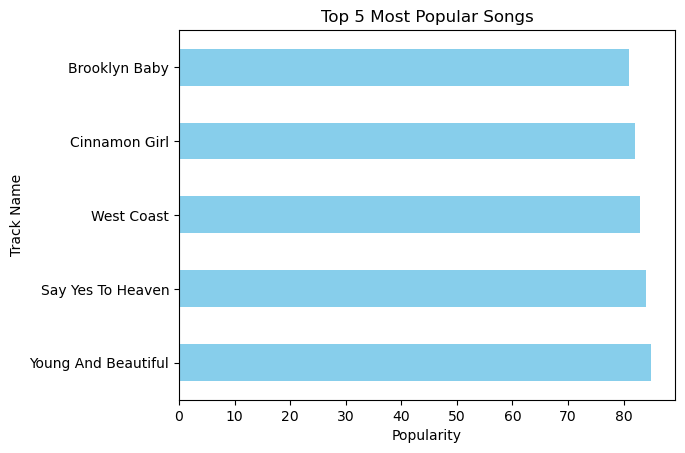

In [15]:
import matplotlib.pyplot as plt

most_popular_songs.plot(kind = 'barh', x = 'Track Name', y='Track Popularity', legend=False, color='skyblue')

plt.title('Top 5 Most Popular Songs')
plt.xlabel('Popularity')
plt.ylabel('Track Name')

plt.show()

### Extract least popular 5 songs:

In [16]:
least_popular_songs = tracks_df.nsmallest(5, 'Track Popularity')
least_popular_songs

,Track Name,Track Popularity,Album ID,Album Name
169,Video Games - Jamie Woon Remix,20,5xQF02P2MtoIIqMCB1MOoM,Video Games Remixes
237,Chloë,21,3hL6ZIcwV6zUfqRiPLPBLJ,Buddy's Rendezvous
167,Video Games - Jakwob and Etherwood Remix,22,5xQF02P2MtoIIqMCB1MOoM,Video Games Remixes
236,(Everything But) Her Love,22,3hL6ZIcwV6zUfqRiPLPBLJ,Buddy's Rendezvous
105,Summertime Sadness [Lana Del Rey vs. Cedric Ge...,23,7EsPt342xAGvGDz9wCrH6S,Summertime Sadness [Lana Del Rey vs. Cedric Ge...


### Visualize:

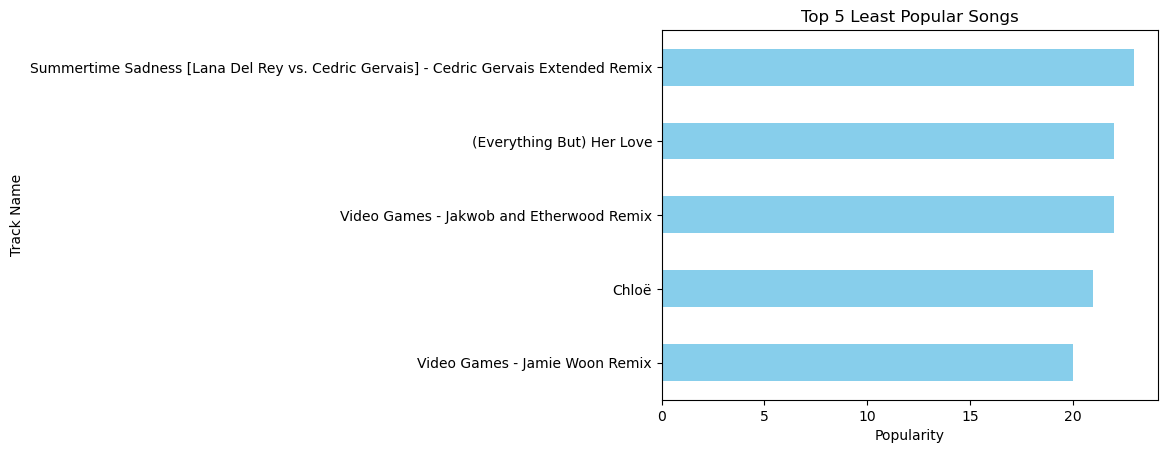

In [18]:
least_popular_songs.plot(kind='barh', x='Track Name', y='Track Popularity', legend=False, color='skyblue')

plt.title('Top 5 Least Popular Songs')
plt.xlabel('Popularity')
plt.ylabel('Track Name')

plt.show()

A good majority of the least popular songs are remixes, to be expected.

Let's dive more into the remix tracks...

### Extracting Remix Tracks:

In [19]:
remix_tracks = tracks_df[tracks_df['Track Name'].str.contains('remix', case=False)]
remix_tracks

,Track Name,Track Popularity,Album ID,Album Name
105,Summertime Sadness [Lana Del Rey vs. Cedric Ge...,23,7EsPt342xAGvGDz9wCrH6S,Summertime Sadness [Lana Del Rey vs. Cedric Ge...
142,Born To Die - Woodkid & The Shoes Remix,38,4X8hAqIWpQyQks2yRhyqs4,Born To Die
161,Summer Bummer - Snakehips Remix,42,7tSNHl6gCeuLj81GZO43Xn,Summer Bummer (Snakehips Remix)
164,Say Yes To Heaven - Anyma Remix,61,35ZI8inROOaI4YkvOmCSLq,Say Yes To Heaven (Anyma Remix)
166,Video Games - Club Clique For The Bad Girls Remix,34,5xQF02P2MtoIIqMCB1MOoM,Video Games Remixes
167,Video Games - Jakwob and Etherwood Remix,22,5xQF02P2MtoIIqMCB1MOoM,Video Games Remixes
169,Video Games - Jamie Woon Remix,20,5xQF02P2MtoIIqMCB1MOoM,Video Games Remixes
170,Video Games - We Don’t Belong In Pacha Remix,26,5xQF02P2MtoIIqMCB1MOoM,Video Games Remixes
173,Summer Bummer - Clams Casino Remix,37,3gY2PiLHPaOmYApYJYPpIi,Summer Bummer (Clams Casino Remix)
174,Lust For Life - BloodPop® Remix,41,3RQdSuT8Y2WGynwlFrJI58,Lust For Life (BloodPop® Remix)


### Visualize:

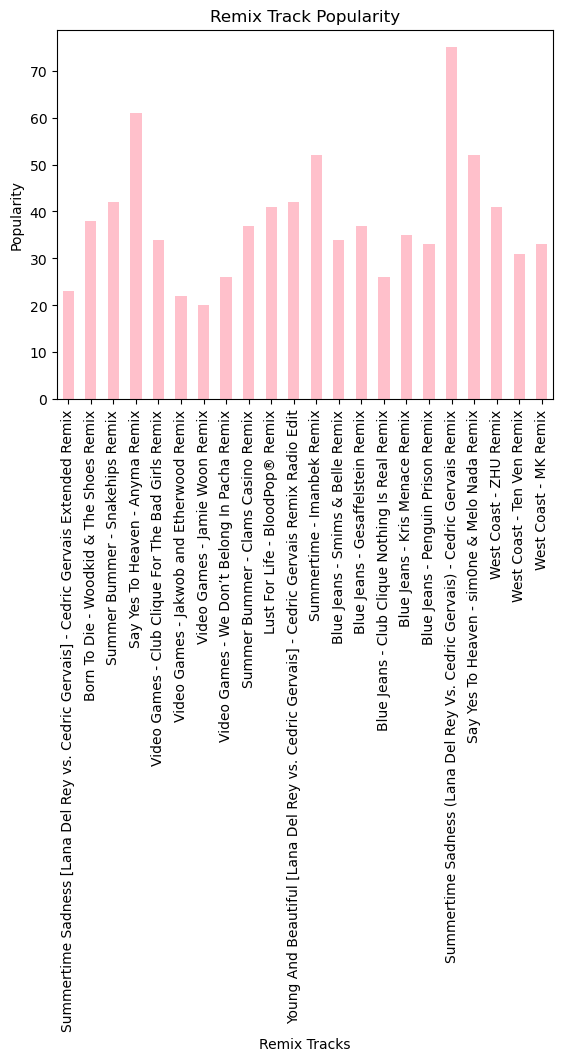

In [78]:
remix_tracks.plot(kind='bar', x='Track Name', y='Track Popularity', legend=None, color = 'pink')

plt.title('Remix Track Popularity')
plt.xlabel('Remix Tracks')
plt.ylabel('Popularity')
plt.show()

In [25]:
summer_sad_df = tracks_df_sorted[tracks_df_sorted['Track Name'] == 'Summertime Sadness']
summer_sad_df.index.min()

14

The remix with the highest popularity rating seems to be Summertime Sadness with Cedric Gervais. Since Summertime Sadness is the 14th most popular song this remix would be expected to be a more popular one. However, the extended remix is 5th LEAST popular song, contrary to the regular remix version.

Sidenote: Summertime Sadness is often considered by the public Lana Del Rey's most popular song. However, on the basis of how Spotify calculates the popularity ratings, the songs more frequently streamed or shared by fans of LDR appear to be more popular based on the type of calculation.

## *Album Analysis*

### Analyzing Overall Album Popularity:

In [26]:
# Merging tracks and albums dataframes on Album Name
album_pop = pd.merge(tracks_df, albums_df, on='Album Name')
album_pop

,Track Name,Track Popularity,Album ID,Album Name,Release Date,Total Tracks,Album Type
0,Honeymoon,61,2DpEBrjCur1ythIZ10gJWw,Honeymoon,2015-09-18,14,album
1,Music To Watch Boys To,65,2DpEBrjCur1ythIZ10gJWw,Honeymoon,2015-09-18,14,album
2,Terrence Loves You,57,2DpEBrjCur1ythIZ10gJWw,Honeymoon,2015-09-18,14,album
3,God Knows I Tried,58,2DpEBrjCur1ythIZ10gJWw,Honeymoon,2015-09-18,14,album
4,High By The Beach,69,2DpEBrjCur1ythIZ10gJWw,Honeymoon,2015-09-18,14,album
...,...,...,...,...,...,...,...
365,Without You,40,3TtsWmvFbChKTWIRfa85lS,Born To Die (Bonus Track Version),2012-01-30,15,album
366,Lolita,42,3TtsWmvFbChKTWIRfa85lS,Born To Die (Bonus Track Version),2012-01-30,15,album
367,Lucky Ones,41,3TtsWmvFbChKTWIRfa85lS,Born To Die (Bonus Track Version),2012-01-30,15,album
368,Season Of The Witch,60,4K7RKXggxezOmccv1Uuviq,"Season Of The Witch (From The Motion Picture ""...",2019-08-09,1,single


### Sort by Popularity:

In [38]:
# Group by Album ID and Album Name, and sum the Track Popularity
album_popularity = album_pop.groupby('Album Name')['Track Popularity'].sum().reset_index()

In [55]:
# Rename column with sum of popularity for each album
album_popularity.rename(columns = {'Track Popularity' : 'Album Popularity'}, inplace = True)
album_popularity.sort_values(by = 'Album Popularity', ascending = False)
album_popularity.nlargest(5, 'Album Popularity')

,Album Name,Album Popularity
4,Born To Die,4866
1,Blue Banisters,1858
7,Born To Die – Paradise Edition (Special Version),1376
6,Born To Die - The Paradise Edition,1239
12,Did you know that there's a tunnel under Ocean...,1020


### Visualizing Top Albums

In [74]:
top_albums = album_popularity.nlargest(15, 'Album Popularity')

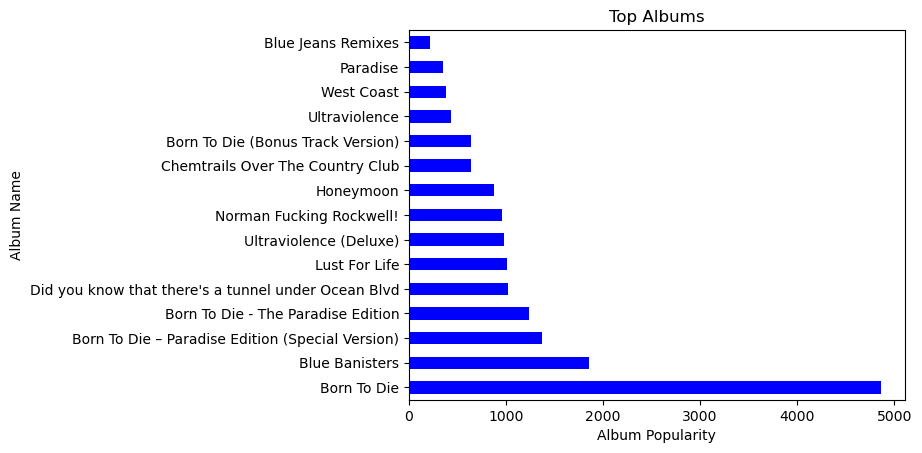

In [80]:
top_albums.plot(kind = 'barh', x = 'Album Name', y = 'Album Popularity', legend = False, color = 'blue')

plt.title('Top Albums')
plt.xlabel('Album Popularity')
plt.ylabel('Album Name')
plt.show()

In [70]:
btd_popularity = album_popularity[album_popularity['Album Name'].str.contains('Born to Die', case=False, na=False)]['Album Popularity']
bb_popularity = album_popularity[album_popularity['Album Name'].str.contains('Blue Banisters', case=False, na=False)]['Album Popularity']
btd_popularity.iloc[0] // bb_popularity.iloc[0]

2

As we can see, Born to Die is unmistakingly Lana Del Rey's most popular ablum with 2 of the special editions ranking above all of her other albums except Blue Banisters. Even so, Born to Die has at least 2 times more of a popularity rating than Blue Banisters, therefore establishing the album's renound popularity when compared to all her other albums.

## Delving into Lana Del Rey's most popular album, Born to Die:

### Extracting BTD Albums:

In [42]:
btd_albums = album_popularity[album_popularity['Album Name'].str.contains('Born to Die', case=False)]
btd_albums

,Album Name,Album Popularity
4,Born To Die,4866
5,Born To Die (Bonus Track Version),640
6,Born To Die - The Paradise Edition,1239
7,Born To Die – Paradise Edition (Special Version),1376


There seems to be multiple Born To Die Albums with varying popularity ratings, some being special editions and bonus track versions.

Upon further research, this seems to be a result of artists usually releasing multiple versions including remixes, etc. to gain more profit.

### Extracting BTD songs from Total tracks:

In [46]:
btd = tracks_df[tracks_df['Album Name'].str.contains('Born to Die', case=False)]
btd

,Track Name,Track Popularity,Album ID,Album Name
79,Born To Die,54,4vXt6IpMcSnqonljffWlMI,Born To Die
80,Off To The Races,49,4vXt6IpMcSnqonljffWlMI,Born To Die
81,Blue Jeans - Remastered 2011,49,4vXt6IpMcSnqonljffWlMI,Born To Die
82,Video Games,51,4vXt6IpMcSnqonljffWlMI,Born To Die
83,Diet Mountain Dew,53,4vXt6IpMcSnqonljffWlMI,Born To Die
...,...,...,...,...
268,Radio,42,5IjSLZhlg0qVq62r2PSfM1,Born To Die
269,Carmen,28,5IjSLZhlg0qVq62r2PSfM1,Born To Die
270,Million Dollar Man,28,5IjSLZhlg0qVq62r2PSfM1,Born To Die
271,Summertime Sadness,34,5IjSLZhlg0qVq62r2PSfM1,Born To Die


### Visualize Top Tracks in BTD:

In [50]:
btd_top = btd.nlargest(10, 'Track Popularity')

Text(0, 0.5, 'Popularity')

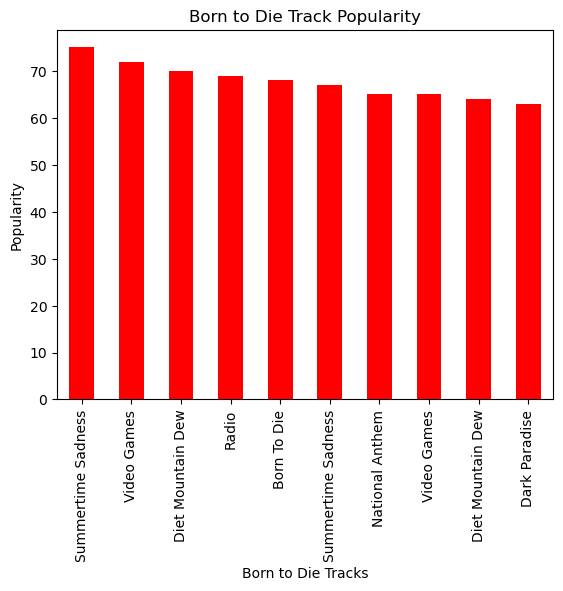

In [81]:
btd_top.plot(kind = 'bar', x = 'Track Name', y = 'Track Popularity', legend = None, color = 'red')

plt.title('Born to Die Track Popularity')
plt.xlabel('Born to Die Tracks')
plt.ylabel('Popularity')

Inference: This confirms our insight above of Summertime Sadness being a very popular song as it is the most popular song from the most popular album.